# 図 2.1 の生成

In [ ]:
! pip install POT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot

In [2]:
# データの生成
x = np.array([
    [2.2, 2.1],
    [3.2, 5.3],
    [4.5, 4.4],
    [3.1, 3.8],
])
y = np.array([
    [4.8, 1.9],
    [4.1, 3.3],
    [2.0, 5.5],
    [3.4, 2.5]
])

In [3]:
C = ((x.reshape(-1, 1, 2) - y.reshape(1, -1, 2)) ** 2).sum(2) # コスト行列の計算

In [4]:
P = ot.emd(np.ones(4) / 4, np.ones(4) / 4, C) # 最適輸送の計算
P

array([[0.  , 0.  , 0.  , 0.25],
       [0.  , 0.  , 0.25, 0.  ],
       [0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  ]])

[]

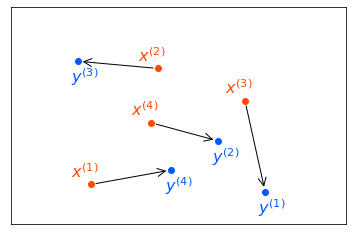

In [5]:
fig, ax = plt.subplots()

ax.scatter(x[:, 0], x[:, 1], c='#ff4b00')
ax.scatter(y[:, 0], y[:, 1], c='#005aff')

p = [
    3, 2, 0, 1
]

for i in range(4):
    ax.text(x[i, 0] - 0.3, x[i, 1] + 0.2, '$x^{(' + str(i+1) + ')}$', fontsize=16, c='#ff4b00')

for i in range(4):
    ax.text(y[i, 0] - 0.1, y[i, 1] - 0.6, '$y^{(' + str(i+1) + ')}$', fontsize=16, c='#005aff')
    
for i in range(4):
    ax.annotate('', xy=(y[p[i], 0], y[p[i], 1]), xytext=(x[i, 0], x[i, 1]), arrowprops={'arrowstyle': '->', 'shrinkA': 5, 'shrinkB': 5, 'mutation_scale': 20})

    
ax.set_xlim(1, 6)
ax.set_ylim(1, 7)

ax.set_xticks([])
ax.set_yticks([])

In [6]:
(C * P).sum() # 最適輸送コスト

2.6675000000000004